In [1]:
library(tidyverse)
library(e1071)
library(distr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.1          ✔ dplyr   0.8.1     
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: startupmsg
Utilities for Start-Up Messages (version 0.9.6)
For more information see ?"startupmsg", NEWS("startupmsg")

Loading required package: sfsmisc

Attaching package: ‘sfsmisc’

The following object is masked from ‘package:dplyr’:

    last

Object Oriented Implementation of Distributions (version 2.8.0)
Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global opti

In [2]:
df_heart <- read_csv('/kaggle/input/heart.csv')

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)


In [3]:
head(df_heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


<b>Probability distributions and hypothesis testing with R</b>

<h2>Normal Distribution</h2>
Useful for finding the probability of an actual, scalar value (or, if the data was normalised a std value from means). Hypothesis test Useful in predicting the probability of finding a value at least as extreme as the one we observed. Normal Dist can also approximate probabilities for binomial data.

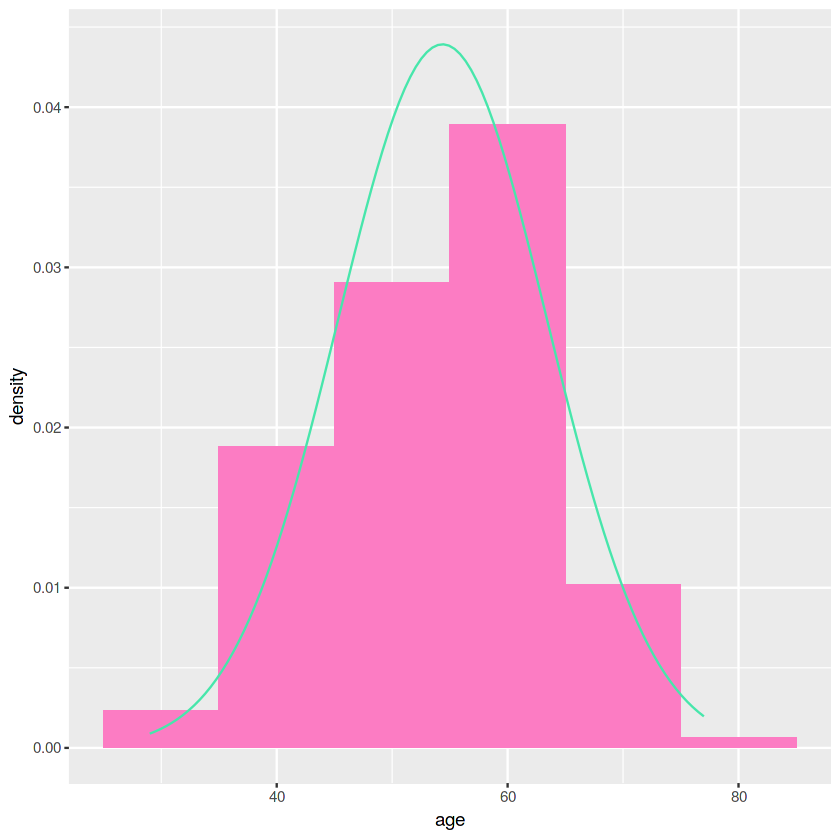

In [4]:
#normal dist of trest bps over the histogram
ggplot(data = df_heart, aes(x=age)) +
geom_histogram(mapping = aes(y=..density..),binwidth=10,fill='#fc7cc3') +
stat_function(fun = dnorm, args = list(mean = mean(df_heart$age), sd = sd(df_heart$age)),color='#47e6ab')

Age isn't really normally distributed. It skews towards older people.

<h4> Context: thalach is the maximum observed heart rate for the patient </h4>

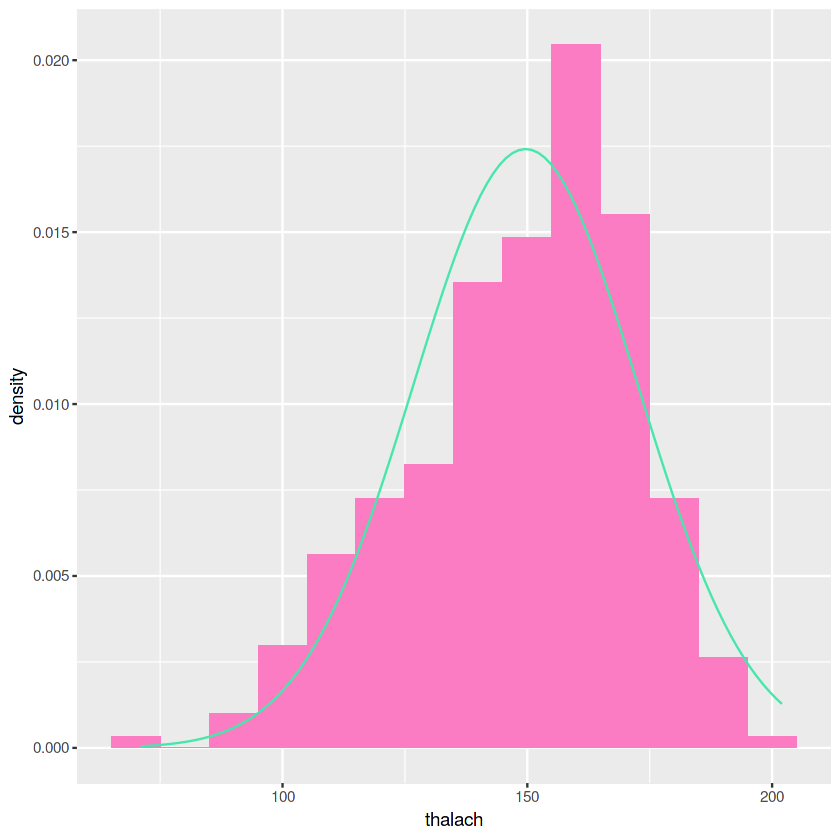

In [5]:
# visual normal probability density function (pdf) dist of trest bps over the histogram
ggplot(data = df_heart, aes(x=thalach)) +
geom_histogram(mapping = aes(y=..density..),binwidth=10,fill='#fc7cc3') +
stat_function(fun = dnorm, args = list(mean = mean(df_heart$thalach),
                                       sd = sd(df_heart$thalach)),color='#47e6ab')

<h2>Normal Cumulative Distribution Function</h2>

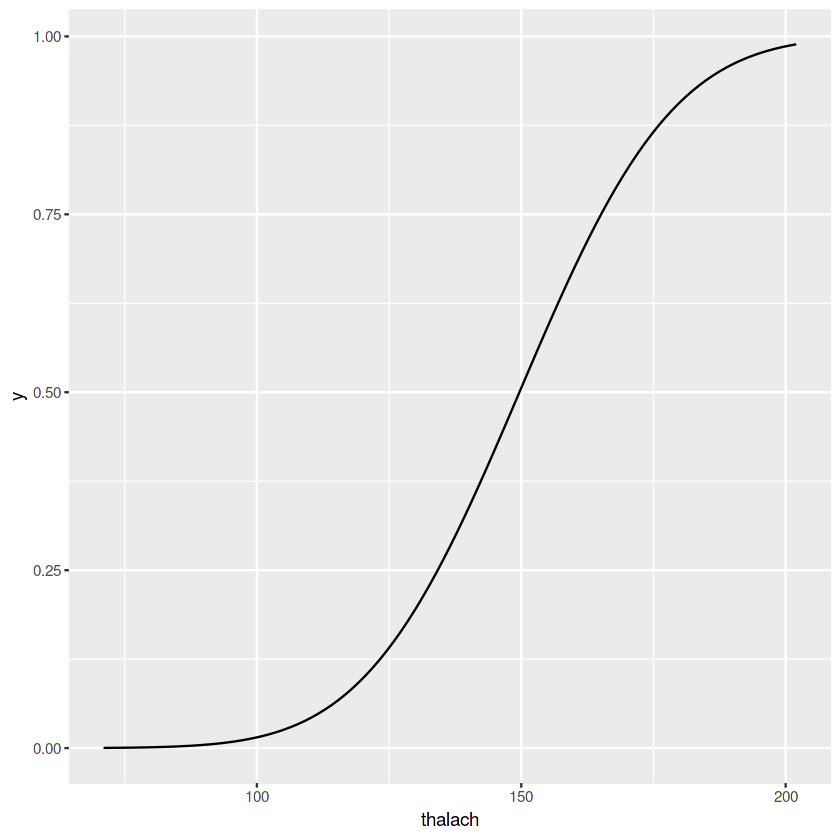

In [6]:
#cumulative distribution function (cdf)
#assuming thalarch is normally distributied, this graph shows the probability
#of observing a value AS HIGH AS the value on the x axis OR LOWER
ggplot(data = df_heart, aes(x=thalach)) +
stat_function(fun = pnorm, args = list(mean = mean(df_heart$thalach),
                                       sd = sd(df_heart$thalach)))

<h2>Hypothesis Testing with Normal Distribution</h2>

In [7]:
#thalach is the MAXIMUM observed heart rate for the patient
mean_thac = mean(df_heart$thalach)
sd_thac = sd(df_heart$thalach)

#NORMAL HYPOTHESIS TEST: the percentage of people who have a heart rate HIGHER than 150
#if lower tail = True, we'd be returning the percentage LOWER than 150 heart rate
pnorm(150,mean=mean_thac,sd=sd_thac,lower.tail=FALSE)

[1] 0.4938496

<h2>Binomial Probability Distribution</h2>
Measures the probabilities of observing x number of binomial (1 or 0) values in a binomial random variable. <br><br>
Can be used for the following 'formula' B(n,p) where: <br>
n is a <b>fixed number</b> of trials<br>
<b>success</b> and <b>failure</b> are the only outomes <br>
there is a <b>fixed</b> probability for success <br>
the trials are <b> Independent </b><br>


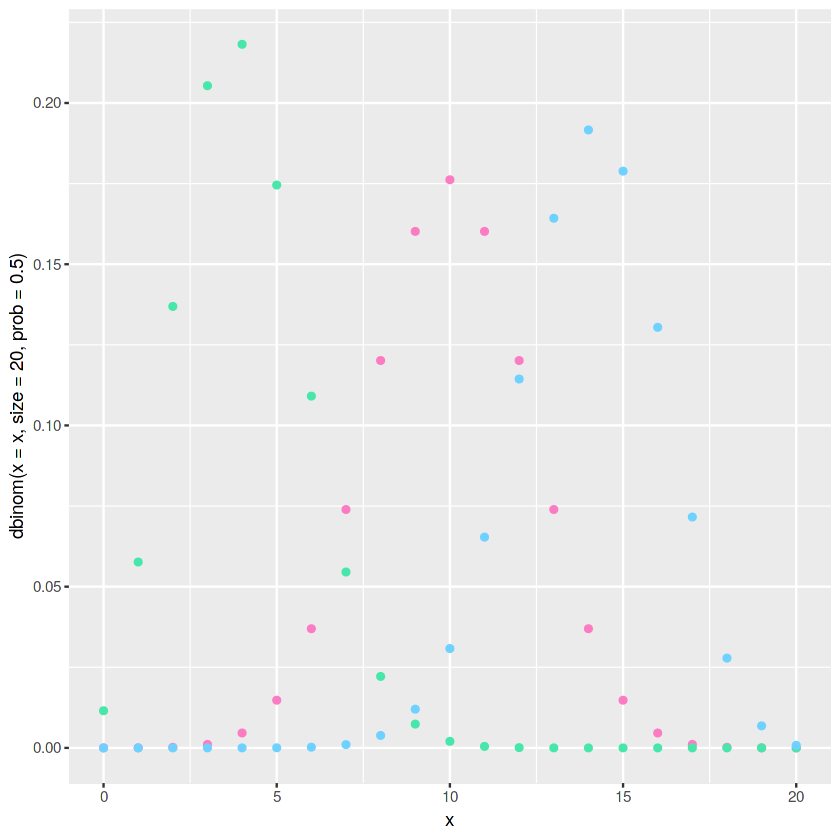

In [8]:
#pdf for binomial distributions

#for exactly x number of observances. These are dots and not lines
#because Binomial is a DISCRETE distribution, it is not defined in between observances
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=dbinom(x=x,size=20,prob=0.5)), colour="#fc7cc3") + #pink
geom_point(aes(y=dbinom(x=x,size=20,prob=0.2)), colour="#47e6ab") + #turquoise
geom_point(aes(y=dbinom(x=x,size=20,prob=0.7)), colour="#6ed1ff") #blue

#these results show that as the probability goes up or down, the probability of getting more
#or less observances increases or decreases with the probability

<h2>Binomial Cumulative Distribution Function</h2>

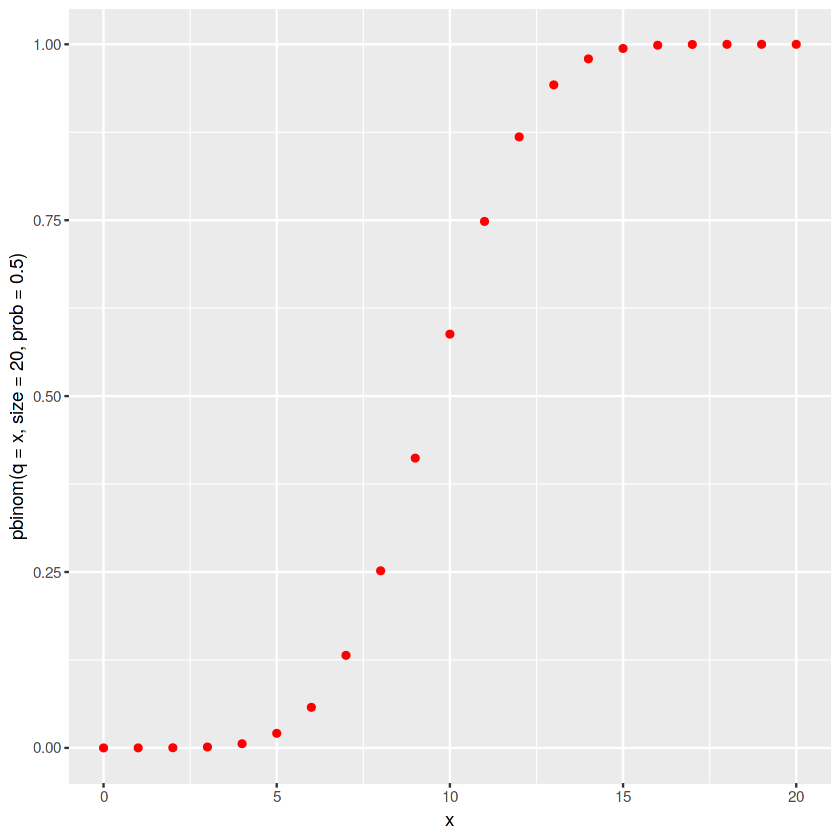

In [9]:
#c = number of observances
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=pbinom(q=x,size=20,prob=0.5)), colour="red")

<h4>A tangible application of binomial distribution</h4>
cumulative probability of dragon boots from spiritual mage, measured using binomial distribution.
(e.g, drop is 1/250).<br> 40% of people get 0 drops. 72% of people get 0 or 1 boots.
93% of people get 0, or 1, or 2 boots etc...<br>
Parameters explained:<br>
q = number of dragon boot drops, size = number of monsters killed, probability = probability of dragon boots drop

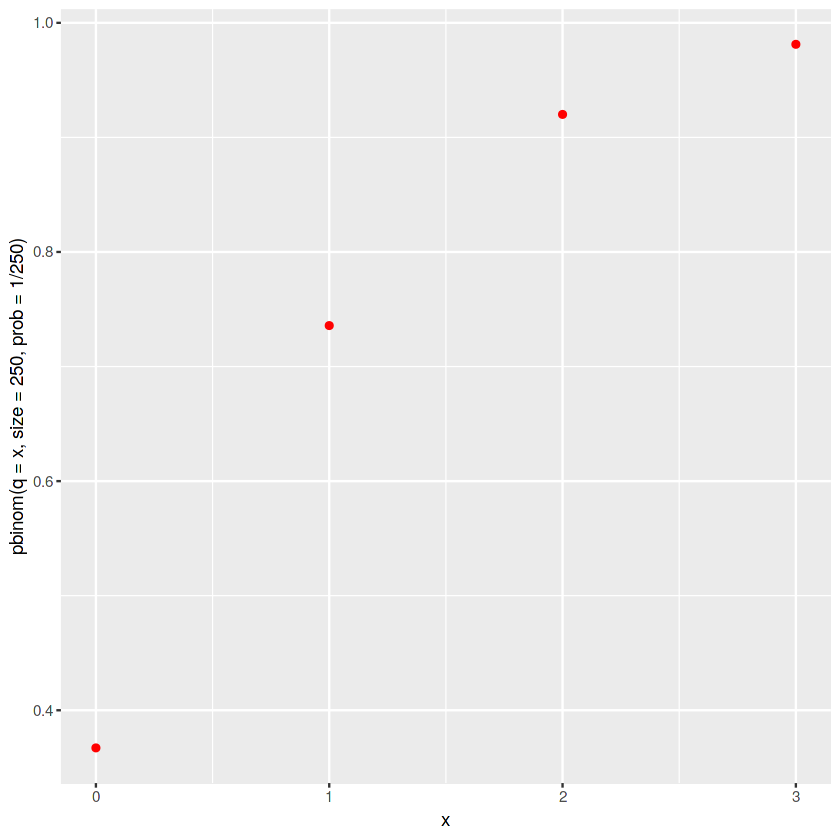

In [10]:

ggplot(data.frame(x=c(0:3)), aes(x)) +
geom_point(aes(y=pbinom(q=x,size=250,prob=1/250)), colour="red")

<h4>Binomial distribution hypothesis testing</h4>
Assuming these are indepdent trials and a fair coin.

Imagine flipping a coin 20 times. The most <b>unlikely</b> outcome is all the coins have the same outcome, of say heads the probability of that outcome is very, close to 0. The same is also true of getting no Heads at all, very unlikely to happen. This means the distribution of probabilities will meet in the middle being the most likely outcome, in this case 10 Heads is the most likely outcome.

In [11]:
#BINOMIAL HYPOTHESIS TEST: is the coin fair? I think it is more likely to give heads
#different tests available "two.sided", "less", "greater"
binom.test(x=17, n=20, p = 0.5,alternative = c("greater"),conf.level = 0.95)


	Exact binomial test

data:  17 and 20
number of successes = 17, number of trials = 20, p-value = 0.001288
alternative hypothesis: true probability of success is greater than 0.5
95 percent confidence interval:
 0.6563362 1.0000000
sample estimates:
probability of success 
                  0.85 


<h2>Possion Probability Distribution</h2>
'Special' case of binomial distribution. Assumes events are occuring randomly and independently. If this is true, then random variable X, the number of events occuring in a fixed unit of time, is said to have a possion distribution.<br>

<b>rate of occurence</b> x <b>fixed unit of time we are interested in</b> = lambda for the possion distiribution<br>


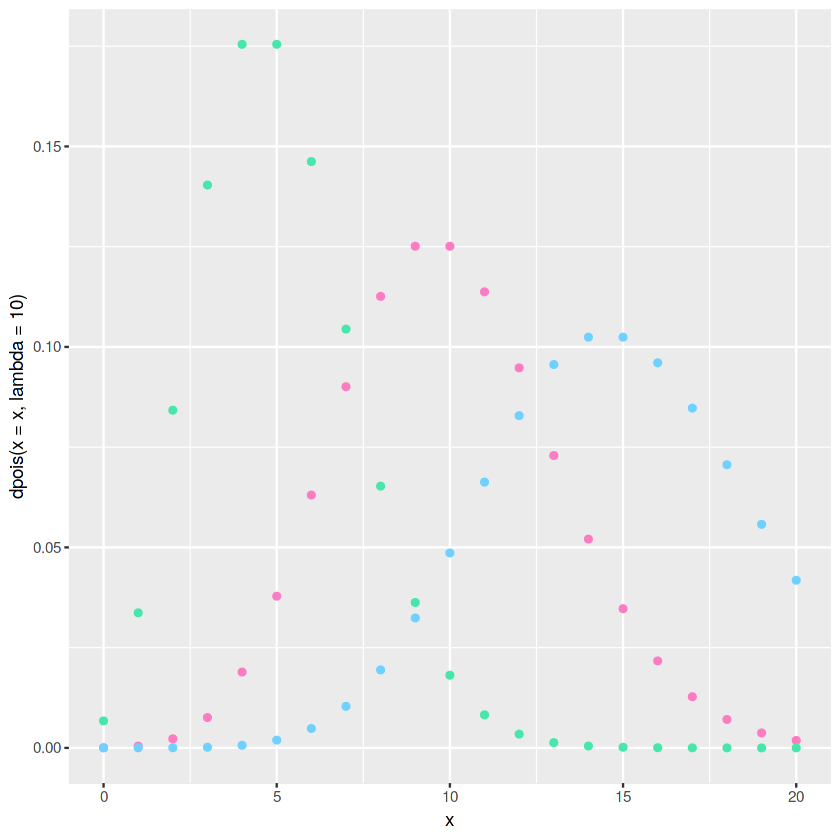

In [12]:
#pdf for possion distributions

ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=dpois(x=x, lambda=10)), colour="#fc7cc3") + #pink
geom_point(aes(y=dpois(x=x, lambda=5)), colour="#47e6ab") + #turquoise
geom_point(aes(y=dpois(x=x, lambda=15)), colour="#6ed1ff") #blue

#e.g we're interested in 10 of these in 1 day = 10 * 1 = lambda, x is our numbers of occurence vector

#y axis interpretation: probability of observing this many values 
#x axis: number of events ovserved

<h2>Possion Cumulative Distribution Function</h2>

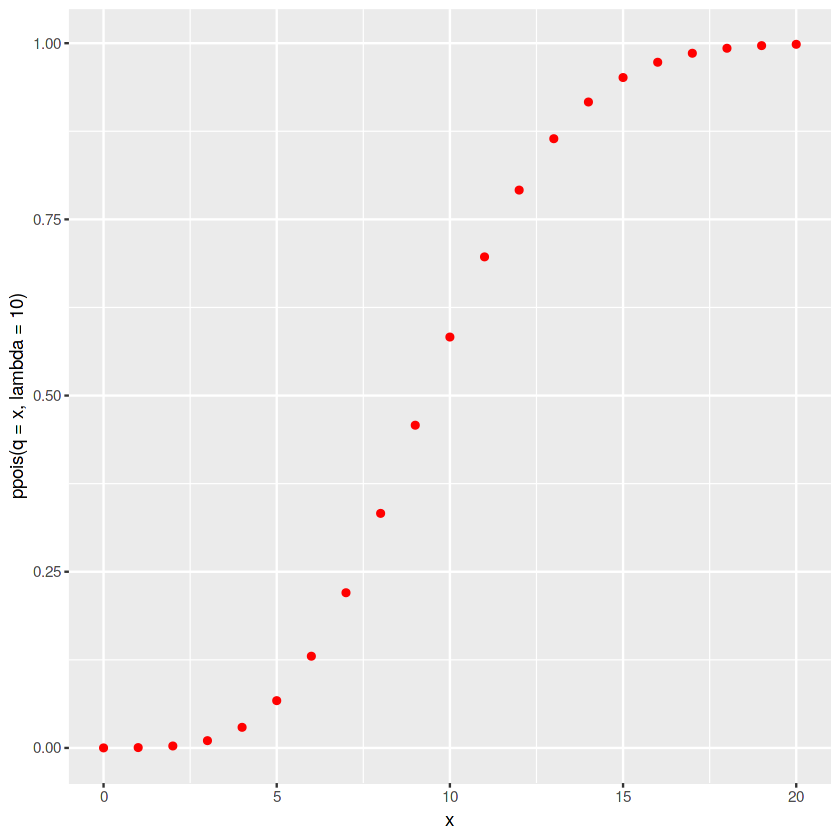

In [13]:
#c = number of observances
ggplot(data.frame(x=c(0:20)), aes(x)) +
geom_point(aes(y=ppois(q=x,lambda=10)), colour="red")

<h2>More examples possion distribution</h2>

<h4>A tangible application of Possion distribution</h4>
cumulative probability of dragon boots from spiritual mage, measured using poisson distribution.
(e.g, drop is 1/250).<br> you kill 100 spiritual mages, and don't get a drop. you kill 200 and don't get a drop.This is not an unusual event. by the time you kill 250, there is just over a 50% chance you received the drop. if you kill well over 300, you can expect a drop.<br>
Parameters explained:<br>
q = number of monsters killed, lambda = expected number to kill for drop (event) 

<b>This implementation seems non standard considering lambda is supposed to be the number of events expected in the given interval</b>

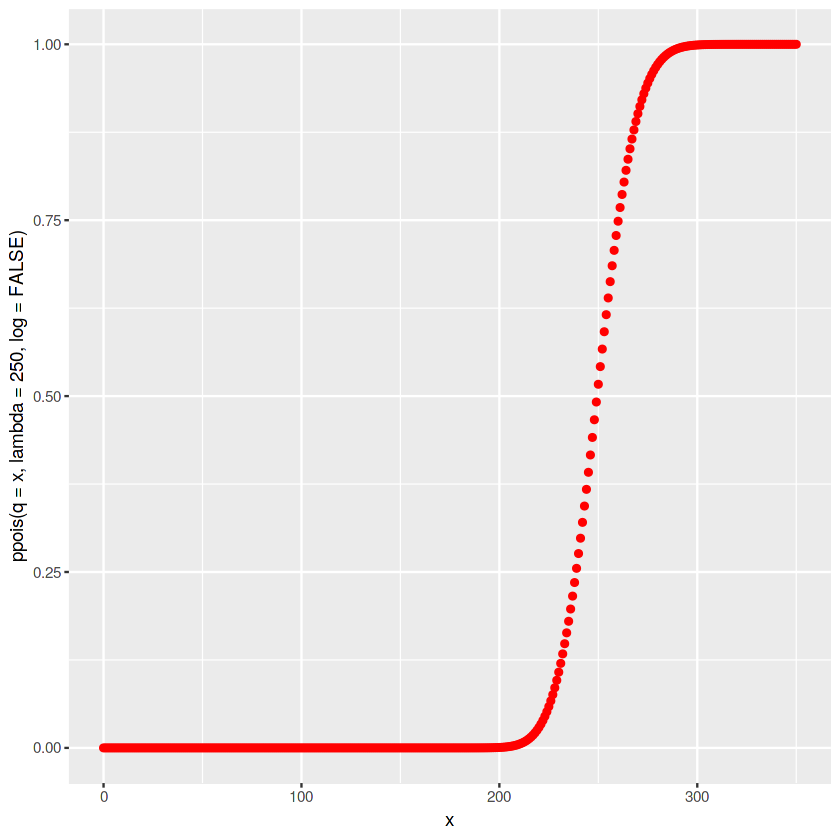

In [14]:
ggplot(data.frame(x=c(0:350)), aes(x)) +
geom_point(aes(y=ppois(q=x,lambda=250,log=FALSE)), colour="red")

In [15]:
#create a vector of length 50 containing 0 or 1 at 50% chance each
#imagine it represents the probability that I see a red car on the way to work
#60% chance that I do not, 40% chance that I do
random_var = rdiscrete(50,c(0.6,0.4),c(0,1))

#as the days go, it becomes more likely that I see a red car on my way to work (for the entire week)
for(day in 1:7){
    lambda_no_red_car_rate = day * 0.6
    print(ppois(q=0,lambda=lambda_no_red_car_rate,lower.tail=TRUE))
    }

#what are the odds that I see a red car every day for a week?
ppois(q=1,lambda=2.8,lower.tail=FALSE)

[1] 0.5488116
[1] 0.3011942
[1] 0.1652989
[1] 0.09071795
[1] 0.04978707
[1] 0.02732372
[1] 0.01499558


[1] 0.7689218

<h2>Uniform Probability Distribution</h2>
If the probabilities of multiple outcomes are the same (e.g rolling a 6 sided dice) we can use a uniform distribution.

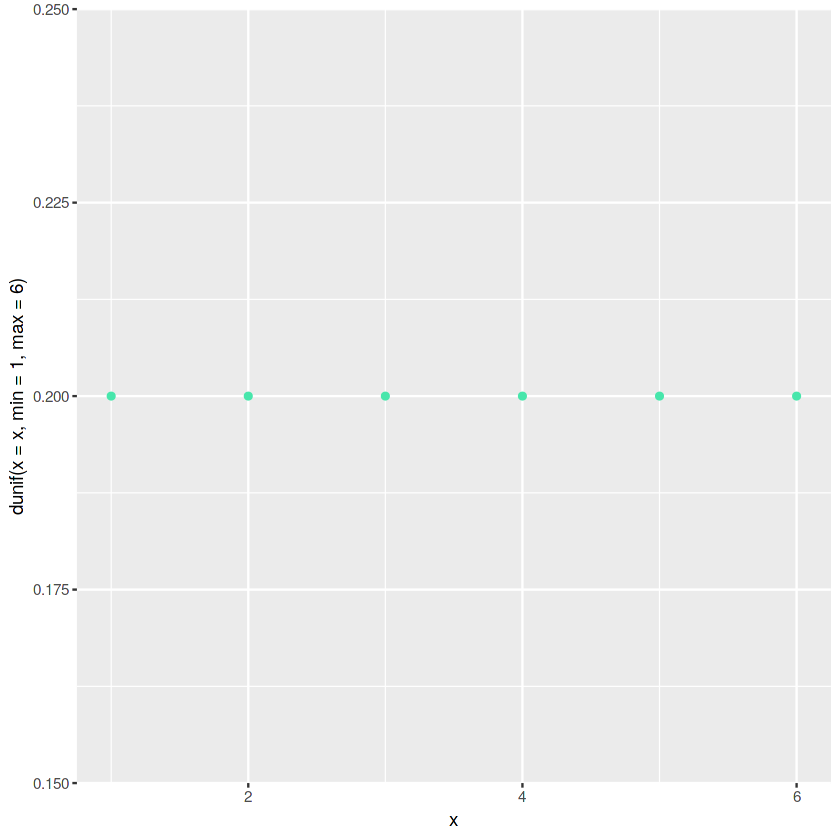

In [16]:
ggplot(data.frame(x=c(1:6)), aes(x)) +
geom_point(aes(y=dunif(x=x,min=1,max=6)), colour="#47e6ab")

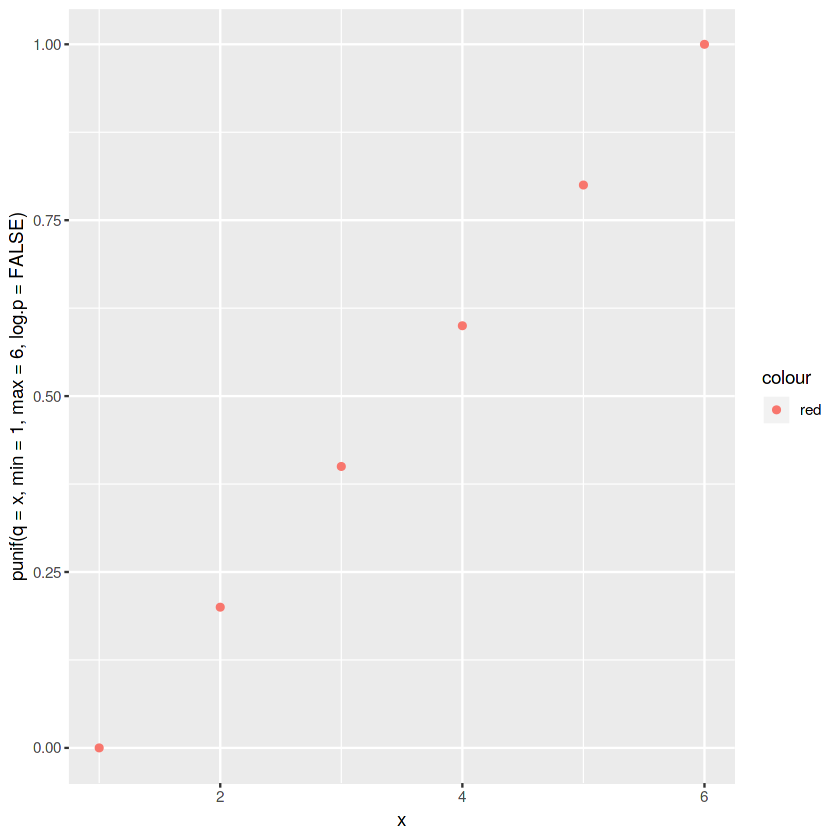

In [17]:
#cdf for uniform distribution
ggplot(data.frame(x=c(1:6)), aes(x)) +
geom_point(aes(y=punif(q=x, min = 1, max = 6, log.p = FALSE), colour="red"))

<h2>Chi squared distribution</h2>
This is a continuous function. Prononuced 'kaii' squared. Most often used in hypothesis tests. area under curve represents the cumulative probability of that outcome for that number degrees of freedom.

[1] 0.8139702

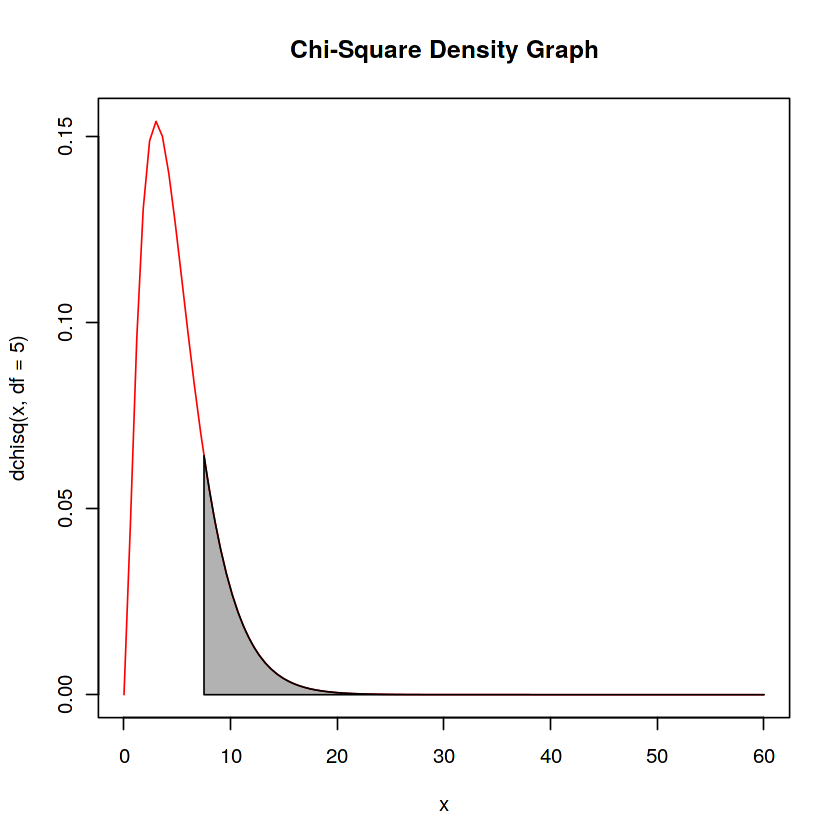

In [18]:
#shows distribution in use, as well as probability testing function
curve( dchisq(x, df=5), col='red', main = "Chi-Square Density Graph",from=0,to=60)
xvec <- seq(7.5,60,length=101)
pvec <- dchisq(xvec,df=5)
polygon(c(xvec,rev(xvec)),c(pvec,rep(0,length(pvec))),
        col=adjustcolor("black",alpha=0.3))

pchisq(7.5,df=5,lower.tail=TRUE)

<h3>Central Limit Theorem</h3>
the means of samples taken from a non-normal distributions (e.g uniform, exponential) are themselves normally distributed. This is useful because we cannot always know that our data matches a normal distribution (we may even know that it is not a normal distribution). for the central limit theorem to be true, we need a minimum of 20 (ideally 30+) samples to take the sample means from.<br><br>
The reason this theorem is important is it allows us to use many statistical tests which are based on the normal distribution. For example students t test can be applied to compare two groupings of sample means which were derived from none normal distributions, or an anova test where we see if there is a difference between 3 or more sample means groupings.